In [7]:
import utils
import time
import MissForest
import category_encoders as ce
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
# col = [
#     'age',
#     'workclass',
#     'fnlwgt','education','education-num',
#     'marital-status','occupation',
#     'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','target'
# ]
# df= pd.read_csv("../Example/data/adult/adult.data",names=col)
# X = df.drop('target',axis=1)
# Y = df['target']!=' <=50K'

In [5]:
result_iter = []
result_score = {'onehot':[], 'MissForest':[]}
result_t = {'onehot':[],'MissForest':[]}

for rate in np.arange(0.1,0.7,0.1):
    print("now at", rate, "\n")
    truth_df = pd.read_csv("../Example/data/HR Employee Attrition.csv")
    X = truth_df.drop('Attrition',axis=1)
    Y = truth_df['Attrition']=='Yes'
    missing_result = utils.simulate_nan(X, nan_rate=rate)
    missing_df = missing_result['X']

    #One hot
    encoder = OneHotEncoder(handle_unknown='ignore')
    X_encoded = encoder.fit_transform(missing_df)
    display(X_encoded)

    X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=1105)
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    result_score['onehot'].append(xgb.score(X_test,y_test))
    print(f"Score: {xgb.score(X_test,y_test)}")
    
    # MissForest
    mf_imputer = MissForest.MissForest(max_iter = 5)
    start_time = time.time()
    df_imp = mf_imputer.fit_transform(missing_df, verbose=True)
    print(f"Execution time: {time.time() - start_time}")
    result_t['MissForest'].append(time.time() - start_time)
    

    encoder = OneHotEncoder(handle_unknown='ignore')
    df_imp_encoded = encoder.fit_transform(df_imp)
    display(X_encoded)

    X_train, X_test, y_train, y_test = train_test_split(df_imp_encoded, Y, test_size=0.2, random_state=1105)
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    print(f"Score: {xgb.score(X_test,y_test)}")
    result_score['MissForest'].append(xgb.score(X_test,y_test))

now at 0.1 



<1470x5064 sparse matrix of type '<class 'numpy.float64'>'
	with 49980 stored elements in Compressed Sparse Row format>

Score: 0.8605442176870748
Iteration: 1/5
Continuous: Age 
Using LGBMRegressor(verbosity=-1)
Category: BusinessTravel 
Using LGBMClassifier(verbosity=-1)
Continuous: DailyRate 
Using LGBMRegressor(verbosity=-1)
Category: Department 
Using LGBMClassifier(verbosity=-1)
Continuous: DistanceFromHome 
Using LGBMRegressor(verbosity=-1)
Continuous: Education 
Using LGBMRegressor(verbosity=-1)
Category: EducationField 
Using LGBMClassifier(verbosity=-1)
Continuous: EmployeeCount 
Using LGBMRegressor(verbosity=-1)
Continuous: EmployeeNumber 
Using LGBMRegressor(verbosity=-1)
Continuous: EnvironmentSatisfaction 
Using LGBMRegressor(verbosity=-1)
Category: Gender 
Using LGBMClassifier(verbosity=-1)
Continuous: HourlyRate 
Using LGBMRegressor(verbosity=-1)
Continuous: JobInvolvement 
Using LGBMRegressor(verbosity=-1)
Continuous: JobLevel 
Using LGBMRegressor(verbosity=-1)
Category: JobRole 
Using LGBMClassifier(verbosity=-1)
Continuous: JobSatisfaction 
Using LGBMRegressor(verbosity=-1)
Category: M

<1470x5064 sparse matrix of type '<class 'numpy.float64'>'
	with 49980 stored elements in Compressed Sparse Row format>

Score: 0.8673469387755102
now at 0.2 



<1470x4606 sparse matrix of type '<class 'numpy.float64'>'
	with 49980 stored elements in Compressed Sparse Row format>

Score: 0.8775510204081632
Iteration: 1/5
Continuous: Age 
Using LGBMRegressor(verbosity=-1)
Category: BusinessTravel 
Using LGBMClassifier(verbosity=-1)
Continuous: DailyRate 
Using LGBMRegressor(verbosity=-1)
Category: Department 
Using LGBMClassifier(verbosity=-1)
Continuous: DistanceFromHome 
Using LGBMRegressor(verbosity=-1)
Continuous: Education 
Using LGBMRegressor(verbosity=-1)
Category: EducationField 
Using LGBMClassifier(verbosity=-1)
Continuous: EmployeeCount 
Using LGBMRegressor(verbosity=-1)
Continuous: EmployeeNumber 
Using LGBMRegressor(verbosity=-1)
Continuous: EnvironmentSatisfaction 
Using LGBMRegressor(verbosity=-1)
Category: Gender 
Using LGBMClassifier(verbosity=-1)
Continuous: HourlyRate 
Using LGBMRegressor(verbosity=-1)
Continuous: JobInvolvement 
Using LGBMRegressor(verbosity=-1)
Continuous: JobLevel 
Using LGBMRegressor(verbosity=-1)
Category: JobRole 
Using LGBMClassifier(verbosity=-1)
Continuous: JobSatisfaction 
Using LGBMRegressor(verbosity=-1)
Category: M

<1470x4606 sparse matrix of type '<class 'numpy.float64'>'
	with 49980 stored elements in Compressed Sparse Row format>

Score: 0.8673469387755102
now at 0.30000000000000004 



<1470x4156 sparse matrix of type '<class 'numpy.float64'>'
	with 49980 stored elements in Compressed Sparse Row format>

Score: 0.8877551020408163
Iteration: 1/5
Continuous: Age 
Using LGBMRegressor(verbosity=-1)
Category: BusinessTravel 
Using LGBMClassifier(verbosity=-1)
Continuous: DailyRate 
Using LGBMRegressor(verbosity=-1)
Category: Department 
Using LGBMClassifier(verbosity=-1)
Continuous: DistanceFromHome 
Using LGBMRegressor(verbosity=-1)
Continuous: Education 
Using LGBMRegressor(verbosity=-1)
Category: EducationField 
Using LGBMClassifier(verbosity=-1)
Continuous: EmployeeCount 
Using LGBMRegressor(verbosity=-1)
Continuous: EmployeeNumber 
Using LGBMRegressor(verbosity=-1)
Continuous: EnvironmentSatisfaction 
Using LGBMRegressor(verbosity=-1)
Category: Gender 
Using LGBMClassifier(verbosity=-1)
Continuous: HourlyRate 
Using LGBMRegressor(verbosity=-1)
Continuous: JobInvolvement 
Using LGBMRegressor(verbosity=-1)
Continuous: JobLevel 
Using LGBMRegressor(verbosity=-1)
Category: JobRole 
Using LGBMClassifier(verbosity=-1)
Continuous: JobSatisfaction 
Using LGBMRegressor(verbosity=-1)
Category: M

<1470x4156 sparse matrix of type '<class 'numpy.float64'>'
	with 49980 stored elements in Compressed Sparse Row format>

Score: 0.8843537414965986
now at 0.4 



<1470x3674 sparse matrix of type '<class 'numpy.float64'>'
	with 49980 stored elements in Compressed Sparse Row format>

Score: 0.8367346938775511
Iteration: 1/5
Continuous: Age 
Using LGBMRegressor(verbosity=-1)
Category: BusinessTravel 
Using LGBMClassifier(verbosity=-1)
Continuous: DailyRate 
Using LGBMRegressor(verbosity=-1)
Category: Department 
Using LGBMClassifier(verbosity=-1)
Continuous: DistanceFromHome 
Using LGBMRegressor(verbosity=-1)
Continuous: Education 
Using LGBMRegressor(verbosity=-1)
Category: EducationField 
Using LGBMClassifier(verbosity=-1)
Continuous: EmployeeCount 
Using LGBMRegressor(verbosity=-1)
Continuous: EmployeeNumber 
Using LGBMRegressor(verbosity=-1)
Continuous: EnvironmentSatisfaction 
Using LGBMRegressor(verbosity=-1)
Category: Gender 
Using LGBMClassifier(verbosity=-1)
Continuous: HourlyRate 
Using LGBMRegressor(verbosity=-1)
Continuous: JobInvolvement 
Using LGBMRegressor(verbosity=-1)
Continuous: JobLevel 
Using LGBMRegressor(verbosity=-1)
Category: JobRole 
Using LGBMClassifier(verbosity=-1)
Continuous: JobSatisfaction 
Using LGBMRegressor(verbosity=-1)
Category: M

<1470x3674 sparse matrix of type '<class 'numpy.float64'>'
	with 49980 stored elements in Compressed Sparse Row format>

Score: 0.8673469387755102
now at 0.5 



<1470x3187 sparse matrix of type '<class 'numpy.float64'>'
	with 49980 stored elements in Compressed Sparse Row format>

Score: 0.8537414965986394
Iteration: 1/5
Continuous: Age 
Using LGBMRegressor(verbosity=-1)
Category: BusinessTravel 
Using LGBMClassifier(verbosity=-1)
Continuous: DailyRate 
Using LGBMRegressor(verbosity=-1)
Category: Department 
Using LGBMClassifier(verbosity=-1)
Continuous: DistanceFromHome 
Using LGBMRegressor(verbosity=-1)
Continuous: Education 
Using LGBMRegressor(verbosity=-1)
Category: EducationField 
Using LGBMClassifier(verbosity=-1)
Continuous: EmployeeCount 
Using LGBMRegressor(verbosity=-1)
Continuous: EmployeeNumber 
Using LGBMRegressor(verbosity=-1)
Continuous: EnvironmentSatisfaction 
Using LGBMRegressor(verbosity=-1)
Category: Gender 
Using LGBMClassifier(verbosity=-1)
Continuous: HourlyRate 
Using LGBMRegressor(verbosity=-1)
Continuous: JobInvolvement 
Using LGBMRegressor(verbosity=-1)
Continuous: JobLevel 
Using LGBMRegressor(verbosity=-1)
Category: JobRole 
Using LGBMClassifier(verbosity=-1)
Continuous: JobSatisfaction 
Using LGBMRegressor(verbosity=-1)
Category: M

<1470x3187 sparse matrix of type '<class 'numpy.float64'>'
	with 49980 stored elements in Compressed Sparse Row format>

Score: 0.8367346938775511
now at 0.6 



<1470x2596 sparse matrix of type '<class 'numpy.float64'>'
	with 49980 stored elements in Compressed Sparse Row format>

Score: 0.8639455782312925
Iteration: 1/5
Continuous: Age 
Using LGBMRegressor(verbosity=-1)
Category: BusinessTravel 
Using LGBMClassifier(verbosity=-1)
Continuous: DailyRate 
Using LGBMRegressor(verbosity=-1)
Category: Department 
Using LGBMClassifier(verbosity=-1)
Continuous: DistanceFromHome 
Using LGBMRegressor(verbosity=-1)
Continuous: Education 
Using LGBMRegressor(verbosity=-1)
Category: EducationField 
Using LGBMClassifier(verbosity=-1)
Continuous: EmployeeCount 
Using LGBMRegressor(verbosity=-1)
Continuous: EmployeeNumber 
Using LGBMRegressor(verbosity=-1)
Continuous: EnvironmentSatisfaction 
Using LGBMRegressor(verbosity=-1)
Category: Gender 
Using LGBMClassifier(verbosity=-1)
Continuous: HourlyRate 
Using LGBMRegressor(verbosity=-1)
Continuous: JobInvolvement 
Using LGBMRegressor(verbosity=-1)
Continuous: JobLevel 
Using LGBMRegressor(verbosity=-1)
Category: JobRole 
Using LGBMClassifier(verbosity=-1)
Continuous: JobSatisfaction 
Using LGBMRegressor(verbosity=-1)
Category: M

<1470x2596 sparse matrix of type '<class 'numpy.float64'>'
	with 49980 stored elements in Compressed Sparse Row format>

Score: 0.8673469387755102


Text(0, 0.5, 'Score')

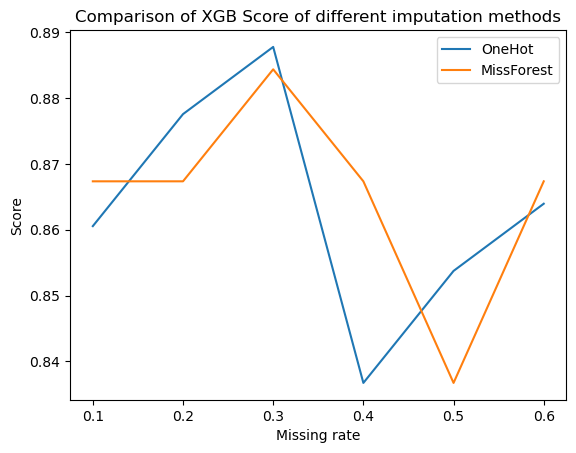

In [8]:
plt.plot(np.arange(0.1,0.7,0.1), result_score['onehot'])
plt.plot(np.arange(0.1,0.7,0.1), result_score['MissForest'])
plt.legend(('OneHot', 'MissForest'))
plt.title("Comparison of XGB Score of different imputation methods")
plt.xlabel("Missing rate")
plt.ylabel("Score")